# Charney-Type Problem

In [1]:
function u_OC(value)
    if(value isa Number)
        return 1/54*(3*exp(6*value -6)*(6*value -1) -2 -exp(-6))
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = 1/54*(3*exp(6*value[i] -6)*(6*value[i] -1) -2 +exp(-6))
        end
        return vector
    end
end

function dq_OC(value)  
    if(value isa Number)
        return -2
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = -2
        end
        return vector
    end
end

function S_OC(value)
    if(value isa Number)
        return exp(6-6*value)
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = exp(6-6*value[i])
        end
        return vector
    end
end
   
function du_OC(value)
    if(value isa Number)
        return 2*value*exp(6*(value-1))
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = 2*value[i]*exp(6*(value[i]-1))
        end
        return vector
    end
end
;

# Comparison of Growth Rates of All Three Methods

In [2]:
using PyPlot
include("FDLinearStability.jl")
include("ChebyshevLinearStability.jl")
include("GalerkinLinearStability.jl")

first_coefficient = 0
beta = 1

kxStart = 0.1
kxFinish = 20.
steps = 200
ky = 0
kxs = collect(LinRange(kxStart, kxFinish, steps))

matrixSize = 16

#Galerkin
eigenValuesAndVectors_16_G = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxs, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
growthRates_16_G, vectors_16_G, w_speeds_16_G = getStabilityValues(eigenValuesAndVectors_16_G, kxs)
#Chebyshev
growthRates_16_C, vectors_16_C, w_speeds_16_C = growthRateEigenValues_Cheb(matrixSize, beta, ky, kxs, S_OC, dq_OC, -2, 0, u_OC(0.0))
#Finite Difference
growthRates_16_F, vectors_16_F, w_speeds_16_F = growthRateEigenValues_fd(matrixSize, beta, ky, kxs, S_OC, u_OC)

matrixSize = 256
#Galerkin
eigenValuesAndVectors_64_G = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxs, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
growthRates_64_G, vectors_64_G, w_speeds_64_G = getStabilityValues(eigenValuesAndVectors_64_G, kxs)
#Chebyshev
growthRates_64_C, vectors_64_C, w_speeds_64_C = growthRateEigenValues_Cheb(matrixSize, beta, ky, kxs, S_OC, dq_OC, -2, 0, u_OC(0.0))
#Finite Difference
growthRates_64_F, vectors_64_F, w_speeds_64_F = growthRateEigenValues_fd(matrixSize, beta, ky, kxs, S_OC, u_OC)
;

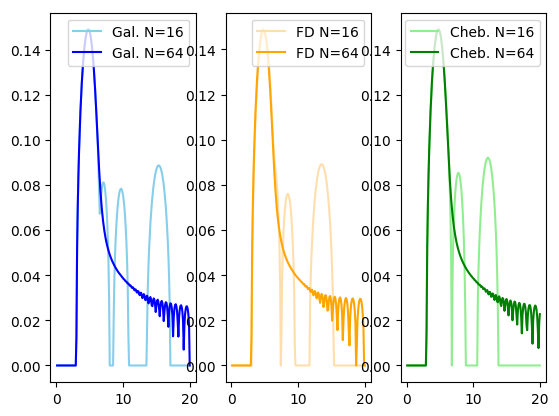

PyObject <matplotlib.legend.Legend object at 0x7f62b2bc1f60>

In [5]:
fig, axes = subplots(1,3)
ax = axes[1]
ax[:plot](kxs, growthRates_16_G, label="Gal. N=16", color="skyblue")
ax[:plot](kxs, growthRates_64_G, label="Gal. N=64", color="b")
ax[:legend](loc="upper right")
ax = axes[2]
ax[:plot](kxs, growthRates_16_F, label="FD N=16",color="navajowhite")
ax[:plot](kxs, growthRates_64_F, label="FD N=64", color="orange")
ax[:legend](loc="upper right")
ax = axes[3]
ax[:plot](kxs, growthRates_16_C, label="Cheb. N=16", color="lightgreen")
ax[:plot](kxs, growthRates_64_C, label="Cheb. N=64", color="g")
ax[:legend](loc="upper right")

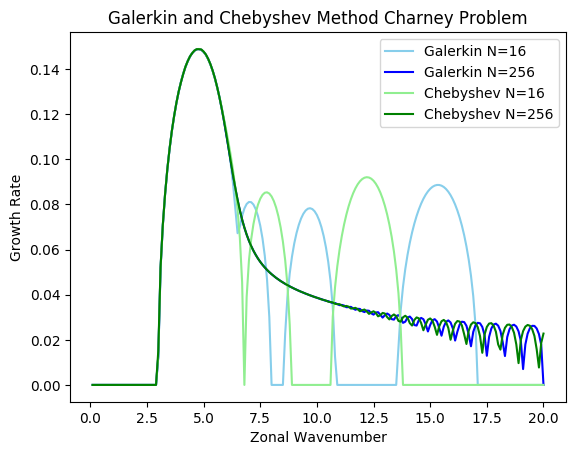

In [28]:
plot(kxs, growthRates_16_G, label="Galerkin N=16",color="skyblue")
plot(kxs, growthRates_64_G, label="Galerkin N=256", color="b")
plot(kxs, growthRates_16_C, label="Chebyshev N=16",color="lightgreen")
plot(kxs, growthRates_64_C, label="Chebyshev N=256",color="g")
legend(loc="upper right")
title("Galerkin and Chebyshev Method Charney Problem")
xlabel("Zonal Wavenumber")
ylabel("Growth Rate")
savefig("G_OceanCharney.eps", format="eps", dpi=1000)

# Error Estimates

In [5]:
using PyPlot
include("FDLinearStability.jl")
include("ChebyshevLinearStability.jl")
include("GalerkinLinearStability.jl")

first_coefficient = 0

steps = 200
beta = 1
ky = 0

kxStart = 0.2
kxFinish = 20.
kxs = collect(LinRange(kxStart, kxFinish, steps))

matrixSize = 280
eigenValuesAndVectors_280 = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxs, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
growthRates_Best_G, vectors_Best_G, w_speeds_Best_G = getStabilityValues(eigenValuesAndVectors_280, kxs)

bestValue_OC = findmax(growthRates_Best_G)
kxValue = kxs[bestValue_OC[2]]


4.776884422110553

In [8]:
nValues = 2 .^(3:8)
#Use below for larger range
#nValues = 2 .^(3:8)

growthRates_G = zeros(length(nValues))
growthRates_F = zeros(length(nValues))
growthRates_C = zeros(length(nValues))

for i = 1:length(nValues)
    nV = round(Int64, nValues[i])
    matrixSize = nV
    #Galerkin
    eigenValuesAndVectors = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxValue, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
    growthRates_g, vectors_g, w_speeds_g = getStabilityValues(eigenValuesAndVectors, kxValue)
    growthRates_G[i] = growthRates_g[1]
    
    #Finite Difference
    growthRates_f, vectors_f, w_speeds_f= growthRateEigenValues_fd(matrixSize, beta, ky, kxValue, S_OC, u_OC)
    growthRates_F[i] = growthRates_f[1]
    
    #Chebyshev
    growthRates_c, vectors_c, w_speeds_c = growthRateEigenValues_Cheb(matrixSize, beta, ky, kxValue, S_OC, dq_OC, -2, 0, u_OC(0.0))
    growthRates_C[i] = growthRates_c[1]
end
;

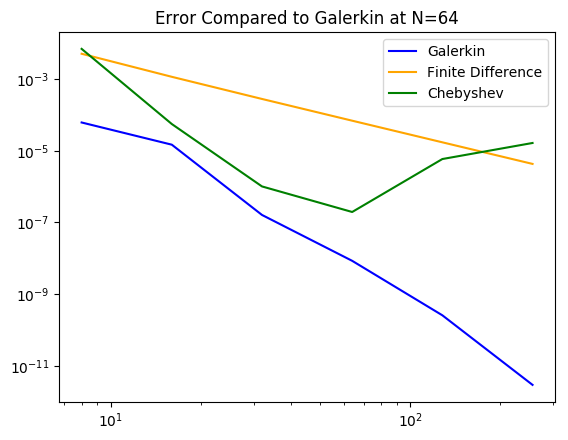

PyObject Text(0.5, 1.0, 'Error Compared to Galerkin at N=64')

In [9]:
plot(nValues, abs.(growthRates_G.-bestValue_OC[1]), label="Galerkin",color="b")
plot(nValues, abs.(growthRates_F.-bestValue_OC[1]), label="Finite Difference",color="orange")
plot(nValues, abs.(growthRates_C.-bestValue_OC[1]), label="Chebyshev",color="g")
yscale("log")
xscale("log")
legend(loc="upper right")
title("Error Compared to Galerkin at N=64")

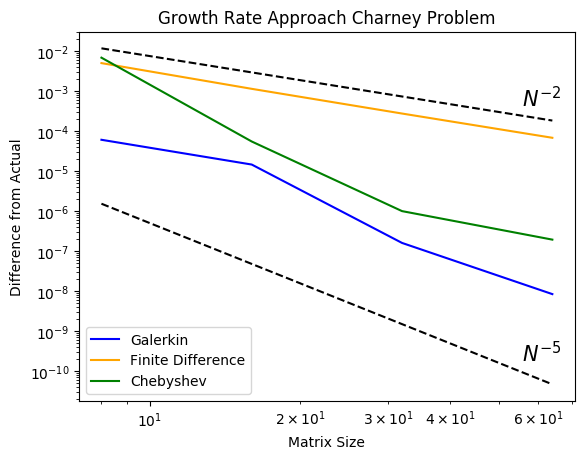

In [15]:
plot(nValues[1:end-2], abs.(growthRates_G[1:end-2].-bestValue_OC[1]), label="Galerkin",color="b")
plot(nValues[1:end-2], abs.(growthRates_F[1:end-2].-bestValue_OC[1]), label="Finite Difference",color="orange")
plot(nValues[1:end-2], abs.(growthRates_C[1:end-2].-bestValue_OC[1]), label="Chebyshev",color="g")
plot(nValues[1:end-2], .75*float(nValues[1:end-2]).^-2, color="k", linestyle="dashed")
plot(nValues[1:end-2], .05*float(nValues[1:end-2]).^-5, color="k", linestyle="dashed")
title("Growth Rate Approach Charney Problem")
xlabel("Matrix Size")
ylabel("Difference from Actual")
yscale("log")
xscale("log")
legend(loc="lower left")
annotate(L"$N^{-2}$",
	xy=[1;0.75],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=15.0,
	ha="right",
	va="bottom")
annotate(L"$N^{-5}$",
	xy=[1;0.06],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=15.0,
	ha="right",
	va="bottom")
savefig("OCApproach.eps", format="eps", dpi=1000)

# Comparison of U and Q Galerkin Functions

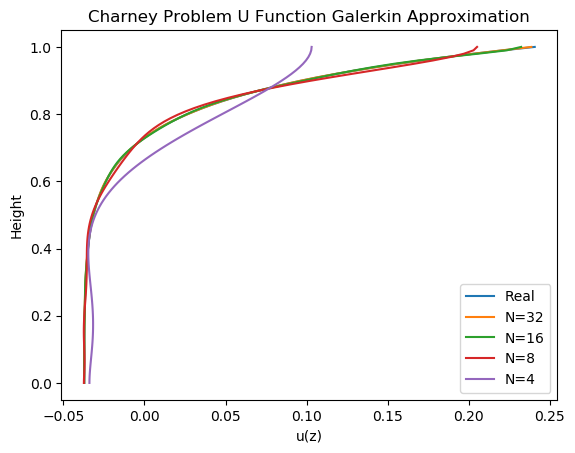

PyObject Text(0.5, 1.0, 'Charney Problem U Function Galerkin Approximation')

In [44]:
matrixSize = 32
B_32 = B_ij(matrixSize)
L_32 = L_ij(matrixSize, S_OC)
dq_coefficients_OC_32 = dq_galerkin_coefficients(matrixSize, dq_OC)
u_coefficients_32 = u_galerkin_coefficients(matrixSize, dq_coefficients_OC_32, -2., 0, 0, du_OC, S_OC, L_32, B_32)

matrixSize = 16
B_16 = B_ij(matrixSize)
L_16 = L_ij(matrixSize, S_OC)
dq_coefficients_OC_16 = dq_galerkin_coefficients(matrixSize, dq_OC)
u_coefficients_16 = u_galerkin_coefficients(matrixSize, dq_coefficients_OC_16, -2., 0, 0, du_OC, S_OC, L_16, B_16)

matrixSize = 8
B_8 = B_ij(matrixSize)
L_8 = L_ij(matrixSize, S_OC)
dq_coefficients_OC_8 = dq_galerkin_coefficients(matrixSize, dq_OC)
u_coefficients_8 = u_galerkin_coefficients(matrixSize, dq_coefficients_OC_8, -2., 0, 0, du_OC, S_OC, L_8, B_8)

matrixSize = 4
B_4 = B_ij(matrixSize)
L_4 = L_ij(matrixSize, S_OC)
dq_coefficients_OC = dq_galerkin_coefficients(matrixSize, dq_OC)
u_coefficients_4 = u_galerkin_coefficients(matrixSize, dq_coefficients_OC, -2., 0, 0, du_OC, S_OC, L_4, B_4)

n_32_values = zeros(100)
n_16_values = zeros(100)
n_8_values = zeros(100)
n_4_values = zeros(100)
heights = collect(LinRange(0,1,100))
real_Values = u_OC(heights)

for i=1:length(heights)
    n_32_values[i] = u_galerkin(32, u_coefficients_32, heights[i])
    n_16_values[i] = u_galerkin(16, u_coefficients_16, heights[i])
    n_8_values[i] = u_galerkin(8, u_coefficients_8, heights[i])
    n_4_values[i] = u_galerkin(4, u_coefficients_4, heights[i])
end

plot(real_Values, heights, label="Real")
plot(n_32_values, heights, label="N=32")
plot(n_16_values, heights, label="N=16")
plot(n_8_values, heights, label="N=8")
plot(n_4_values, heights, label="N=4")
legend(loc="lower right")
ylabel("Height")
xlabel("u(z)")
title("Charney Problem U Function Galerkin Approximation")
#savefig("UFunctions.eps", format="eps", dpi=1000)

# Comparison of q Function at Different k Values

In [3]:
first_coefficient = 0
#matrixSize = 32
matrixSize = 256

beta = 1
ky = 0
kValue_OC_High = 8.

#eigenValuesAndVectors_q_High = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kValue_OC_High, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
#growthRates_q_High, vectors_q_High, w_speeds_q_High = getStabilityValues(eigenValuesAndVectors_q_High, kValue_OC_High)


kValue_OC_Low = 5
#eigenValuesAndVectors_q_Low= getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kValue_OC_Low, S_OC, dq_OC, du_OC, -2, 0, first_coefficient)
#growthRates_q_Low, vectors_q_Low, w_speeds_q_Low = getStabilityValues(eigenValuesAndVectors_q_Low, kValue_OC_Low)

heights = collect(LinRange(0,1,500))
maxIndex = argmax(growthRates_q_Low)
highVector = vectors_q_Low[maxIndex]
q_coeffs_Low = highVector[2:end-1]
q_coeffs_High = vectors_q_High[1]
u_values_Low = zeros(length(heights))
u_values_High = zeros(length(heights))
for i=1:length(heights)
    u_value_full_Low = u_galerkin(matrixSize, q_coeffs_Low, heights[i])
    u_value_full_High = u_galerkin(matrixSize, q_coeffs_High, heights[i])
    u_values_Low[i] = abs(u_value_full_Low)
    u_values_High[i] = abs(u_value_full_High)
end
;

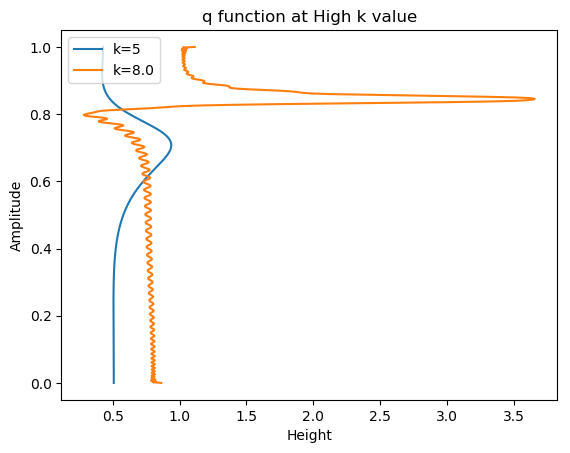

PyObject Text(24.000000000000007, 0.5, 'Amplitude')

In [50]:
plot(u_values_Low, heights, label="k=$kValue_OC_Low")
plot(u_values_High, heights, label="k=$kValue_OC_High")
legend(loc="upper left")
title("q function at High k value")
xlabel("Height")
ylabel("Amplitude")
#savefig("OceanCharney_qfunction.eps", format="eps", dpi=1000)

In [12]:
findfirst(x->x==5, kxs)

50

In [25]:
#matrixSize = 32
matrixSize = 256

kxStart = 0.1
kxFinish = 20.
steps = 200
beta = 1
ky = 0

highValue = 8
lowValue = 5

highIndex = findfirst(x->x==highValue, kxs)
lowIndex = findfirst(x->x==lowValue, kxs)

heights = collect(LinRange(0,1,500))
q_coeffs_128_5 = vectors_64_F[lowIndex]
q_coeffs_128_8 = vectors_64_F[highIndex]
u_values_128_OC_5 = zeros(length(heights))
u_values_128_OC_8 = zeros(length(heights))
for i=1:length(heights)
    u_value_full = u_galerkin(matrixSize, q_coeffs_128_5, heights[i])
    u_value_full_8 = u_galerkin(matrixSize, q_coeffs_128_8, heights[i])
    u_values_128_OC_5[i] = abs(u_value_full)
    u_values_128_OC_8[i] = abs(u_value_full_8)
end

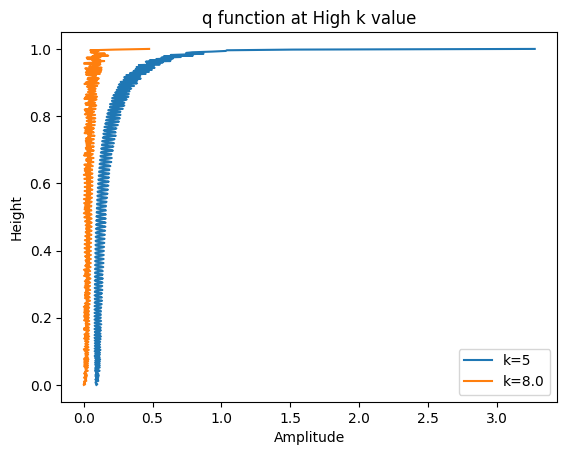

PyObject Text(0.5, 24.0, 'Amplitude')

In [26]:
plot(u_values_128_OC_5, heights, label="k=5")
plot(u_values_128_OC_8, heights, label="k=8.0")
legend(loc="lower right")
title("q function at High k value")
ylabel("Height")
xlabel("Amplitude")
#savefig("OceanCharney_qfunction.eps", format="eps", dpi=1000)